# ACML: Neural Networks
## Dogan Aykas 6227725

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting random seed to certain value
np.random.seed(1)

In [3]:
# Sigmoid Function necessary for calculation activation values based on z
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [4]:
# Helper function for choosing hyperparameters
def Average(lst): 
    return sum(lst) / len(lst) 

In [5]:
# List containing all the training examples which are vectors
x_m = [np.array([[1],
               [0],
               [0],
               [0],
               [0],
               [0],
               [0],
               [0]]), np.array([[0],
               [1],
               [0],
               [0],
               [0],
               [0],
               [0],
               [0]]), np.array([[0],
               [0],
               [1],
               [0],
               [0],
               [0],
               [0],
               [0]]), np.array([[0],
               [0],
               [0],
               [1],
               [0],
               [0],
               [0],
               [0]]), np.array([[0],
               [0],
               [0],
               [0],
               [1],
               [0],
               [0],
               [0]]), np.array([[0],
               [0],
               [0],
               [0],
               [0],
               [1],
               [0],
               [0]]), np.array([[0],
               [0],
               [0],
               [0],
               [0],
               [0],
               [1],
               [0]]), np.array([[0],
               [0],
               [0],
               [0],
               [0],
               [0],
               [0],
               [1]])]

In [6]:
# Feedforward function returning the necessary z2, z3, a2 and a3 values
def feedforward(x):
    z2 = (np.matmul(W1, x) + b1)
    a2 = sigmoid(z2)
    z3 = (np.matmul(W2, a2) + b2)
    a3 = sigmoid(z3)
    return z2, z3, a2, a3

In [7]:
# Implementation function of the gradient descent. Takes iteration amount, alpha and lambda values as inputs and returns the updated W1, W2, b1 and b2 matrices
def backpropagation(iterations, alpha, lambd):
    W1 = np.random.rand(3,8)
    W2 = np.random.rand(8,3)
    b1 = np.random.rand(3,1)
    b2 = np.random.rand(8,1)
    for i in range(iterations):
        d_W_1_f = np.zeros((3,8))
        d_W_2_f = np.zeros((8,3))
        b1_f = np.zeros((3,1))
        b2_f = np.zeros((8,1))
        for j in range(8):
            z2 = (np.matmul(W1, x_m[j]) + b1)
            a2 = sigmoid(z2)
            z3 = (np.matmul(W2, a2) + b2)
            a3 = sigmoid(z3)
            e3 = np.multiply(-1*(x_m[j] - a3), np.multiply(a3, 1 - a3))
            e2 = np.multiply(np.matmul(W2.T, e3), np.multiply(a2, 1 - a2))
            d_W_1 = np.matmul(e2, x_m[j].T)
            d_W_2 = np.matmul(e3, a2.T)
            d_b_1 = e2
            d_b_2 = e3 
            d_W_1_f = d_W_1_f + d_W_1
            d_W_2_f = d_W_2_f + d_W_2
            b1_f = b1_f + d_b_1
            b2_f = b2_f + d_b_2
        W1 = W1 - alpha*(((1/8)*d_W_1_f) + lambd*W1)
        W2 = W2 - alpha*(((1/8)*d_W_2_f) + lambd*W2)
        b1 = b1 - alpha*((1/8)*b1_f)
        b2 = b2 - alpha*((1/8)*b2_f)
    return W1, W2, b1, b2

In [8]:
# Experimenting with different learning rate values
a = []
acc = []
for x in np.arange(0, 1.1, 0.05):
    W1, W2, b1, b2 = backpropagation(iterations = 10000, alpha=x, lambd=0)
    aa = []
    for i in range(len(x_m)):
        z2, z3, a2, a3 = feedforward(x_m[i])
        #print(a3[i])
        aa.append(a3[i])
    a.append(aa)
    
for i in a:
    acc.append(Average(i))

Text(0.5, 0, 'Learning Rate Parameter vs Accuracy')

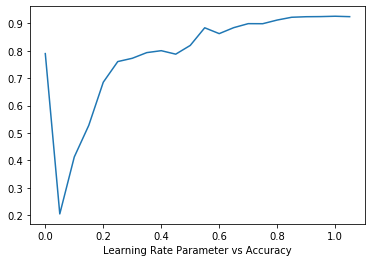

In [9]:
# Depicting accuracy for different choices of learning rate
plt.plot(np.arange(0, 1.1, 0.05), acc) 
plt.xlabel("Learning Rate Parameter vs Accuracy")

In [10]:
# Experimenting with different weight decay values
a = []
acc = []
for x in np.arange(0, 1.1, 0.05):
    W1, W2, b1, b2 = backpropagation(iterations = 10000, alpha=0.85, lambd=x)
    aa = []
    for i in range(len(x_m)):
        z2, z3, a2, a3 = feedforward(x_m[i])
        #print(a3[i])
        aa.append(a3[i])
    a.append(aa)
    
for i in a:
    acc.append(Average(i))

Text(0.5, 0, 'Weight Decay Parameter vs Accuracy')

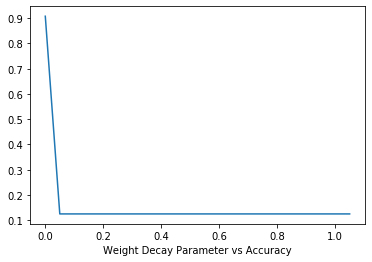

In [11]:
# Depicting accuracy for different choices of weight decay
plt.plot(np.arange(0, 1.1, 0.05), acc) 
plt.xlabel("Weight Decay Parameter vs Accuracy")

In [12]:
# Calling the backpropagation function
W1, W2, b1, b2 = backpropagation(iterations = 1000000, alpha=0.85, lambd=0)

In [13]:
# Showing the activation values of the output neurons, each converging to 1 or 0, depending on the input values of training examples
# Replace a3[i] with a3 for depicting the values of all nodes for all examples.
for i in range(len(x_m)):
    z2, z3, a2, a3 = feedforward(x_m[i])
    print(a3[i])

[0.99285169]
[0.99343514]
[0.99188065]
[0.99336863]
[0.99479189]
[0.99143645]
[0.99376574]
[0.99284371]


In [14]:
W1

array([[ 4.86170246, -2.83199226,  6.31077546, -5.43253138, -3.22927088,
         1.59847906, -4.57978743,  4.67220003],
       [-1.17833605,  4.6307884 ,  6.71036666,  4.39668447, -3.70609407,
         1.33551276, -4.63427531, -5.35851288],
       [ 6.41428751,  6.16604059,  0.81400597, -0.86868162, -3.59076653,
        -6.64995992,  2.11260624, -0.62901002]])

In [15]:
W2

array([[  9.10062021,  -5.82245087,  15.16866961],
       [ -6.26991442,   8.88540071,  13.63002566],
       [ 11.55967384,  13.00624992,   3.08086252],
       [-13.14656556,  13.70357729, -13.27716444],
       [ -8.49434189,  -9.14893879, -13.1984179 ],
       [  8.70240328,   7.49175148, -25.81023761],
       [-11.12444605, -12.47007147,  12.16225687],
       [ 13.93226474, -15.42140252, -11.60718592]])

In [16]:
b1

array([[-0.68854839],
       [-0.71978381],
       [-0.29632253]])

In [17]:
b2

array([[-18.40539703],
       [-17.10305714],
       [-21.61693866],
       [ -5.17054947],
       [  5.79128491],
       [ -6.29223379],
       [ -5.27384002],
       [ -5.41481104]])